<a href="https://colab.research.google.com/github/Leegyu66/-/blob/main/05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [6]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- ffff


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [26]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)


- test_size를 20%로 하면 테스트 세트에 20%만 들어간다는 뜻

In [27]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [31]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


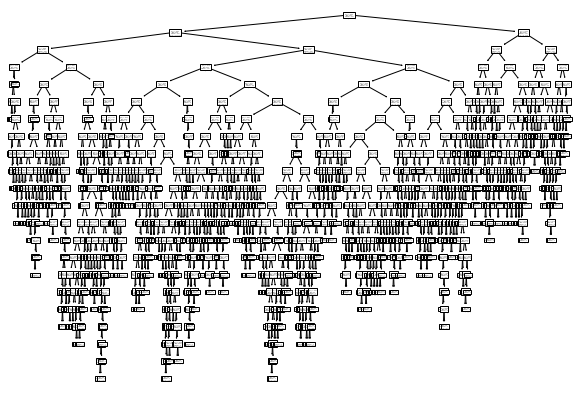

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7)) # 표의 사이즈 결정정
plot_tree(dt)
plt.show()

## 결정트리
- 루트노드들의 질문을 따라가며 내려감
- 리프노드의 예측값이 샘플의 x값이 된다

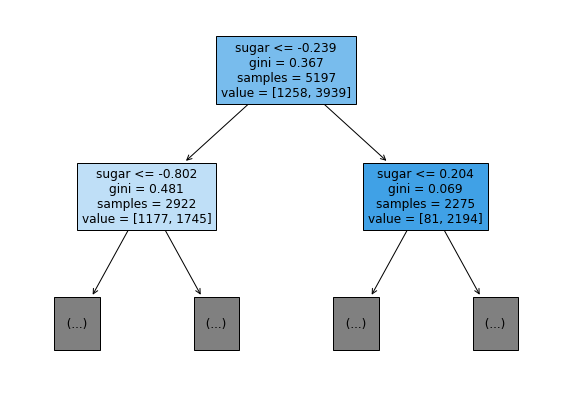

In [37]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 슈가를 기준으로 슈가가 -0.239보다 작으면 왼쪽샘플 크면 오른쪽샘플로 보냄
- value는 저 노드에 있는 샘플을 나눈거 음성클래스, 양성 클래스의 갯수

## 지니불순도
- 샘플이 양성클래스, 음성클래스로 얼마나 갔는지에 대한 비율

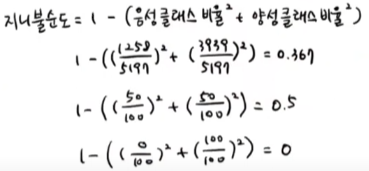

- 부모 노드의 불순도와 자식 노드의 불순도의 차이가 높아야지 좋은 것임
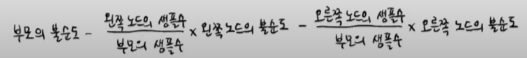

## 가지치기
- 너무 많이 분할하면 훈련 세트에만 잘맞는 과대적합이 될 수도 있기 때문


In [39]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # max_depth를 줄이면 가지도 줄어듦듦
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


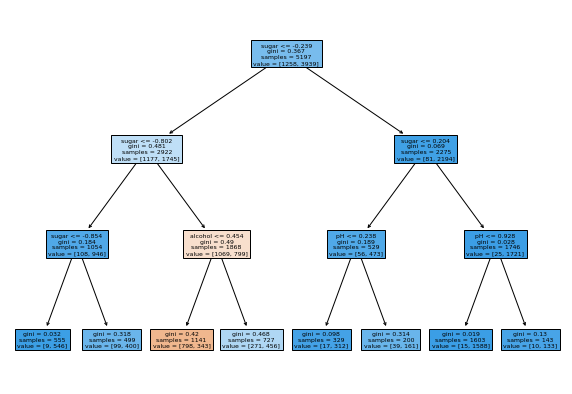

In [41]:
plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [43]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
